In [2]:
import pandas as pd
import numpy as np

# read in the data from the file
data = pd.read_csv('krkopt.data',
                   names=['wk_col','wk_row', 'rook_col','rook_row', 
                          'bk_col','bk_row', 'result'], delimiter=",")

In [31]:
# Look at the overall structure of the data (how many rows and columns)
print("Data Shape: ", data.shape)
# See how this table looks
print("Data Head: ")
print(data.head())
# See the info and data type of each colum
data.info()

Data Shape:  (28056, 7)
Data Head: 
  wk_col  wk_row rook_col  rook_row bk_col  bk_row result
0      a       1        b         3      c       2   draw
1      a       1        c         1      c       2   draw
2      a       1        c         1      d       1   draw
3      a       1        c         1      d       2   draw
4      a       1        c         2      c       1   draw
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   wk_col    28056 non-null  object
 1   wk_row    28056 non-null  int64 
 2   rook_col  28056 non-null  object
 3   rook_row  28056 non-null  int64 
 4   bk_col    28056 non-null  object
 5   bk_row    28056 non-null  int64 
 6   result    28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [32]:
# Checking if there are some missing values
print("Missing values: ")
print(data.isna().sum())

Missing values: 
wk_col      0
wk_row      0
rook_col    0
rook_row    0
bk_col      0
bk_row      0
result      0
dtype: int64


In [33]:
# We see that the max value of wk_row is 4, but other pieces is 8, which means 
# that white king can move only on the bottom part of board.
print("Data Description: ")
print(data.describe())

Data Description: 
             wk_row      rook_row        bk_row
count  28056.000000  28056.000000  28056.000000
mean       1.854006      4.512404      4.451811
std        0.926414      2.282723      2.248387
min        1.000000      1.000000      1.000000
25%        1.000000      3.000000      3.000000
50%        2.000000      5.000000      4.000000
75%        2.000000      6.000000      6.000000
max        4.000000      8.000000      8.000000


 14    4553
 13    4194
 12    3597
 11    2854
-1     2796
 15    2166
 10    1985
 9     1712
 8     1433
 7      683
 6      592
 5      471
 16     390
 2      246
 4      198
 3       81
 1       78
 0       27
Name: result, dtype: int64


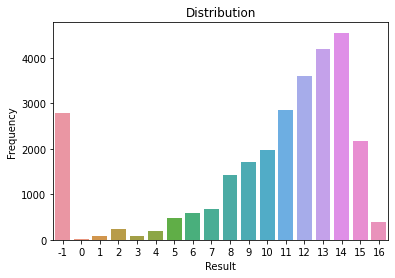

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Formatting the 'result' column to numeric values (we set draw as -1)
data['result'] = data['result'].replace({'draw': -1, 'zero': 0, 'one': 1, 
                                         'two': 2, 'three': 3, 'four': 4, 
                                         'five': 5, 'six': 6, 'seven': 7, 
                                         'eight': 8, 'nine': 9, 'ten': 10, 
                                         'eleven': 11, 'twelve': 12, 
                                         'thirteen': 13, 'fourteen': 14, 
                                         'fifteen': 15, 'sixteen': 16})

# Get the count of each class in the 'result' column
results_count = data['result'].value_counts()
print(results_count)

# Create a bar plot on the distribution of different result values
sns.barplot(x=results_count.index, y=results_count.values)
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Distribution')

# Show the plot
plt.show()

In [4]:
data0 = data

wk_dummies = pd.get_dummies(data0['wk_col'], prefix='is_wk_col')
data0 = pd.concat([data0, wk_dummies], axis=1)
data0.drop(['wk_col'], axis=1, inplace=True)

rook_dummies = pd.get_dummies(data0['rook_col'], prefix='is_rook_col')
data0 = pd.concat([data0, rook_dummies], axis=1)
data0.drop(['rook_col'], axis=1, inplace=True)

bk_dummies = pd.get_dummies(data0['bk_col'], prefix='is_bk_col')
data0 = pd.concat([data0, bk_dummies], axis=1)
data0.drop(['bk_col'], axis=1, inplace=True)
data0.head()

,wk_row,rook_row,bk_row,result,is_wk_col_a,is_wk_col_b,is_wk_col_c,is_wk_col_d,is_rook_col_a,is_rook_col_b,...,is_rook_col_g,is_rook_col_h,is_bk_col_a,is_bk_col_b,is_bk_col_c,is_bk_col_d,is_bk_col_e,is_bk_col_f,is_bk_col_g,is_bk_col_h
0,1,3,2,-1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,2,-1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,-1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,2,-1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2,1,-1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
%pip install sklearn
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X = data0.drop(columns=['result'])
y = data0['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
X_train

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,wk_row,rook_row,bk_row,is_wk_col_a,is_wk_col_b,is_wk_col_c,is_wk_col_d,is_rook_col_a,is_rook_col_b,is_rook_col_c,...,is_rook_col_g,is_rook_col_h,is_bk_col_a,is_bk_col_b,is_bk_col_c,is_bk_col_d,is_bk_col_e,is_bk_col_f,is_bk_col_g,is_bk_col_h
20482,2,1,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20631,2,3,6,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
27228,1,3,5,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8879,2,7,8,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16826,1,5,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1,1,8,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5390,1,3,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
860,1,7,8,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
15795,2,6,8,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lrc = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [7]:
# Evaluate the performance of the model on the train set
y_train_pred_lrc = lrc.predict(X_train)
print("Train set accuracy: ", metrics.accuracy_score(y_train, y_train_pred_lrc))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_train, y_train_pred))
print("Classification report: \n", metrics.classification_report(y_train, y_train_pred_lrc))

# Evaluate the performance of the model on the test set
y_test_pred_lrc = lrc.predict(X_test)
print("Test set accuracy: ", metrics.accuracy_score(y_test, y_test_pred_lrc))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))
print("Classification report: \n", metrics.classification_report(y_test, y_test_pred_lrc))

Train set accuracy:  0.33033327392621636
Classification report: 
               precision    recall  f1-score   support

          -1       0.15      0.09      0.11      2247
           0       0.47      0.33      0.39        21
           1       0.43      0.05      0.10        56
           2       0.50      0.77      0.61       197
           3       0.45      0.26      0.33        69
           4       0.41      0.34      0.38       157
           5       0.37      0.52      0.43       379
           6       0.40      0.34      0.37       464
           7       0.21      0.06      0.09       554
           8       0.35      0.51      0.41      1146
           9       0.27      0.20      0.23      1366
          10       0.23      0.11      0.15      1614
          11       0.29      0.24      0.26      2245
          12       0.32      0.32      0.32      2851
          13       0.33      0.40      0.37      3373
          14       0.38      0.58      0.46      3631
          15   

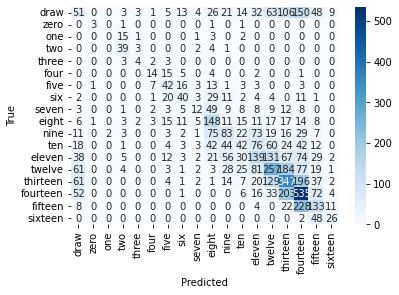

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computing confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_lrc)

# Plotting the confusion matrix heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=["draw", "zero","one", "two", "three", "four","five","six",
                         "seven","eight","nine","ten","eleven","twelve","thirteen",
                         "fourteen","fifteen","sixteen"],
            yticklabels=["draw", "zero","one", "two", "three", "four","five","six",
                         "seven","eight","nine","ten","eleven","twelve","thirteen",
                         "fourteen","fifteen","sixteen"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,
                             max_depth=18)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=1000)

In [10]:
y_train_pred_rfc = rfc.predict(X_train)
print("Train set accuracy: ", metrics.accuracy_score(y_train, y_train_pred_rfc))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_train, y_train_pred))
print("Classification report: \n", metrics.classification_report(y_train, y_train_pred_rfc))

# Evaluate the performance of the model on the test set
y_test_pred_rfc = rfc.predict(X_test)
print("Test set accuracy: ", metrics.accuracy_score(y_test, y_test_pred_rfc))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))
print("Classification report: \n", metrics.classification_report(y_test, y_test_pred_rfc))

Train set accuracy:  0.9962573516307254
Classification report: 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2247
           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00       197
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00       157
           5       1.00      1.00      1.00       379
           6       1.00      1.00      1.00       464
           7       1.00      0.99      1.00       554
           8       1.00      1.00      1.00      1146
           9       1.00      1.00      1.00      1366
          10       1.00      1.00      1.00      1614
          11       1.00      1.00      1.00      2245
          12       1.00      1.00      1.00      2851
          13       1.00      1.00      1.00      3373
          14       0.99      1.00      0.99      3631
          15    

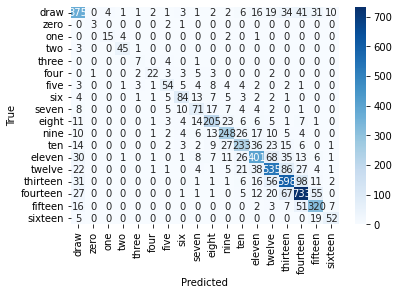

In [11]:
# Computing confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_rfc)

# Plotting the confusion matrix heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=["draw", "zero","one", "two", "three", "four","five","six",
                         "seven","eight","nine","ten","eleven","twelve","thirteen",
                         "fourteen","fifteen","sixteen"],
            yticklabels=["draw", "zero","one", "two", "three", "four","five","six",
                         "seven","eight","nine","ten","eleven","twelve","thirteen",
                         "fourteen","fifteen","sixteen"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
import xgboost as xgb

xgb0 = xgb.XGBClassifier(n_estimators=100, max_depth=13)

xgb0.fit(X_train, y_train)

XGBClassifier(max_depth=13, objective='multi:softprob')

In [15]:
y_train_pred_xgb = xgb0.predict(X_train)
print("Train set accuracy: ", metrics.accuracy_score(y_train, y_train_pred_xgb))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_train, y_train_pred))
print("Classification report: \n", metrics.classification_report(y_train, y_train_pred_xgb))

# Evaluate the performance of the model on the test set
y_test_pred_xgb = xgb0.predict(X_test)
print("Test set accuracy: ", metrics.accuracy_score(y_test, y_test_pred_xgb))
# print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_test_pred))
print("Classification report: \n", metrics.classification_report(y_test, y_test_pred_xgb))

Train set accuracy:  0.9959900196043486
Classification report: 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2247
           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00       197
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00       157
           5       1.00      1.00      1.00       379
           6       1.00      1.00      1.00       464
           7       1.00      1.00      1.00       554
           8       1.00      1.00      1.00      1146
           9       1.00      1.00      1.00      1366
          10       1.00      1.00      1.00      1614
          11       1.00      1.00      1.00      2245
          12       1.00      1.00      1.00      2851
          13       0.99      0.99      0.99      3373
          14       0.99      0.99      0.99      3631
          15    

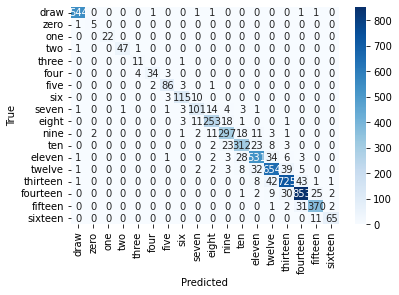

In [16]:
# Computing confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_xgb)

# Plotting the confusion matrix heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=["draw","zero","one", "two", "three", "four","five","six",
                         "seven","eight","nine","ten","eleven","twelve","thirteen",
                         "fourteen","fifteen","sixteen"],
            yticklabels=["draw","zero","one", "two", "three", "four","five","six",
                         "seven","eight","nine","ten","eleven","twelve","thirteen",
                         "fourteen","fifteen","sixteen"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
